## Isi nama dan NIM seluruh anggota kelompok IF-44-11
#   Nama    NIM
#   Edward Billy Hadipuspito - 1301201291
#   Farhan Tirta Kesumah - 1301204108
#   Caesar Fanany - 1301204144
#   Ryan Chandra Hadi - 1301204125
#   
#   

In [192]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree


# Load Dataset
Inisialisasi variable, masukan NIM di sini untuk random state.

Gunakan NIM salah satu anggota kelompok.



In [193]:
filepath = "https://raw.githubusercontent.com/bloodsking/teambased/main/seeds_dataset.csv"

# Isi nim anda di sini
nim = 1301204125

Load dataset, cek konten data

Target kelas: **Category** 

In [194]:
df = pd.read_csv(filepath, sep="\t")
df.sample(10, random_state=nim)

,Area,Perimeter,Compactness,Kernel_len,Kernel_width,Assymetry,Groove_len,Category
199,12.76,13.38,0.8964,5.073,3.155,2.828,4.830,3
51,15.78,14.91,0.8923,5.674,3.434,5.593,5.136,1
26,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,1
190,10.93,12.80,0.8390,5.046,2.717,5.398,5.045,3
33,13.94,14.17,0.8728,5.585,3.150,2.124,5.012,1
28,14.11,14.18,0.8820,5.541,3.221,2.754,5.038,1
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750,2
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
107,17.63,15.86,0.8800,6.033,3.573,3.747,5.929,2
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3


Training/test split **60/40**

In [195]:
# X: semua kolom, Y: kolom terakhir (category)
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=nim)

# We perform bootstrap on the train data
# Keep test data for final accuracy testing
len(x_train), len(x_test)

(126, 84)

In [196]:
# Hitung jumlah fitur yang dipergunakan
nr_features = len(x_train.columns)

# Bangun decision tree menggunakan entropy, dengan batasan max_depth = nr_feature + 1
# Note: Kedalaman tree dibatasi untuk mempermudah visualisasi
rf_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=nr_features+1)
rf_model = rf_model.fit(x_train, y_train)

# Random Forest
Build a Random Forest, consisting of 20 Decision Tree classifer, with the following steps:

1. Prepare Bootstrap data (choose randomly from the *training data*, use sampling with replacement)
2. Choose 2-4 random features/atributes for each tree
3. Build Decision Tree classifier using step (1) and (2)
4. Calculate OOB score within the tree only

**NOTE**
This whole exercise has been simplified.
- Tree can be created using a library, therefore you may not be able control the feature selection on node level
- Random features are only selected in the beginning of each tree.
- OOB score is only calculated within its own tree instead.
- Typically Random Forest don't use train/test split and can be validated using OOB error. We simplify this to make it easier to test.
- You are not allowed to use a Random Forest or Bagging library.


In [209]:
np.random.seed(nim)
n_tree = 20

forest = []
bootstrap_columns = []
for i in range(n_tree):
    # 1. Bootstrapping
    # select random rows
    rows = np.random.choice(x_train.index, size=len(x_train), replace=True)
    x_bootstrap = x_train.loc[rows]
    y_bootstrap = y_train.loc[rows]

    # Out of Bag data
    non_selected_rows = np.setdiff1d(x_train.index, rows)
    x_oob = x_train.loc[non_selected_rows]
    y_oob = y_train.loc[non_selected_rows]

    # 2. Select random features (make sure to keep track the selected columns)
    # Check for any repeated combinations
    feature_taken = np.random.randint(2, 4)
    cols = np.random.choice(x_bootstrap.columns, size=feature_taken, replace=True)
    bootstrap_columns.append(cols)

    # filter based on the selected columns
    x_bootstrap = x_bootstrap.loc[:, cols]

    # 3. Build decision tree
    # Let it grow, no pruning
    tree_model = tree.DecisionTreeClassifier()
    tree_model.fit(x_bootstrap, y_bootstrap)

    # Add it to the forest
    forest.append(tree_model)

    # 4. Calculate oob score only within its own tree
    # ....
    oob_score = tree_model.score(x_oob.loc[:, cols], y_oob)
    print(f"Tree {i+1}: OOB Score = {oob_score:.3f}")
    print(f"nr of OOB : {len(x_oob)}")
    print(f"Selected Column or Atribute : {cols}\n")


Tree 1: OOB Score = 0.830
nr of OOB : 53
Selected Column or Atribute : ['Groove_len' 'Kernel_len']

Tree 2: OOB Score = 0.809
nr of OOB : 47
Selected Column or Atribute : ['Area' 'Area']

Tree 3: OOB Score = 0.818
nr of OOB : 44
Selected Column or Atribute : ['Compactness' 'Groove_len']

Tree 4: OOB Score = 0.886
nr of OOB : 44
Selected Column or Atribute : ['Area' 'Groove_len' 'Kernel_width']

Tree 5: OOB Score = 0.857
nr of OOB : 42
Selected Column or Atribute : ['Kernel_len' 'Compactness' 'Groove_len']

Tree 6: OOB Score = 0.756
nr of OOB : 41
Selected Column or Atribute : ['Kernel_width' 'Perimeter' 'Perimeter']

Tree 7: OOB Score = 0.833
nr of OOB : 48
Selected Column or Atribute : ['Area' 'Groove_len']

Tree 8: OOB Score = 0.750
nr of OOB : 44
Selected Column or Atribute : ['Assymetry' 'Perimeter' 'Kernel_len']

Tree 9: OOB Score = 0.729
nr of OOB : 48
Selected Column or Atribute : ['Perimeter' 'Kernel_width' 'Kernel_len']

Tree 10: OOB Score = 0.826
nr of OOB : 46
Selected Colum

# Prediction and Voting
Run prediction on x_test data for each tree

Also calculate accuracy per tree here

In [201]:
all_preds = []
for i, tree_model in enumerate(forest):
    # Each tree has different column requirements
    # Make sure you use the correct columns for each tree
    x_test_filtered = x_test.loc[:, bootstrap_columns[i]]
    
    predictions = tree_model.predict(x_test_filtered)

    # Might as well calculate accuracy per tree here...

    # acc = np.mean(predictions == y_test)
    acc = tree_model.score(x_test_filtered, y_test)
    print(acc)
    # add it to all_preds for voting later
    all_preds.append(predictions)
    

all_preds = np.array(all_preds)

0.8571428571428571
0.8809523809523809
0.7857142857142857
0.8452380952380952
0.8571428571428571
0.8095238095238095
0.9285714285714286
0.7857142857142857
0.8214285714285714
0.7738095238095238
0.8928571428571429
0.8214285714285714
0.5119047619047619
0.7738095238095238
0.8333333333333334
0.7857142857142857
0.8095238095238095
0.8690476190476191
0.8452380952380952
0.7380952380952381


### Perform voting on the predictions from the Random Forest

In [202]:
# Insert voting code here
voted_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=all_preds)

# Calculate accuracy of Test data on the Forest
acc = np.mean(voted_predictions == y_test)
acc



0.9166666666666666

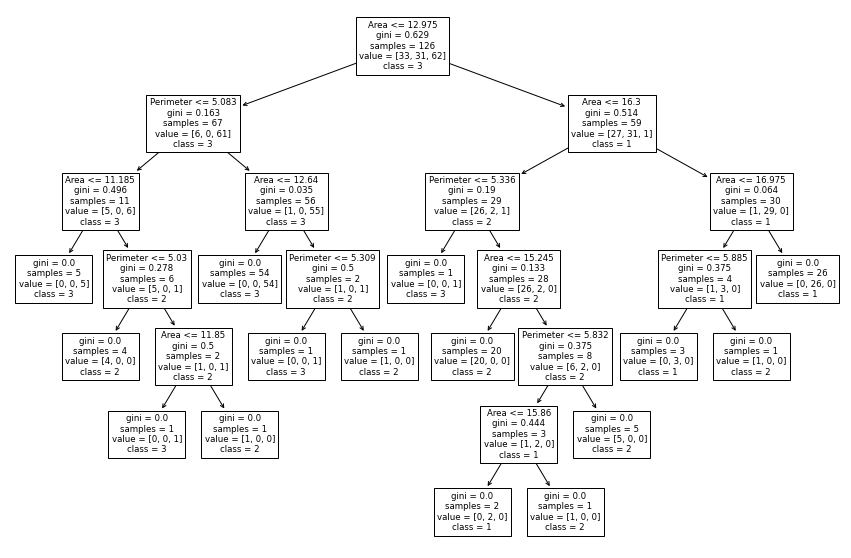

In [203]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(tree_model, ax=ax, feature_names=x_train.columns, class_names=y_train.unique().astype(str))
plt.show()

After you're done with all this, please check the excel file and put the answers for every column there.